## Data

 [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). 

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display 
import util.pcaplot as pcaplot
%matplotlib inline

In [2]:
try:
    data = pd.read_csv("../data/customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded!")

Wholesale customers dataset has 440 samples with 6 features each.


## 数据探索

**Description of Categories**
- FRESH: annual spending (m.u.) on fresh products (Continuous)
- MILK: annual spending (m.u.) on milk products (Continuous)
- GROCERY: annual spending (m.u.) on grocery products (Continuous)
- FROZEN: annual spending (m.u.)on frozen products (Continuous) 
- DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
- DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous)
    - "A store selling cold cuts, cheeses, and a variety of salads, as well as a selection of unusual or foreign prepared foods."

In [3]:
stats = data.describe()
stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 典型样本

In [4]:
# Fresh <Q1
fresh_q1 = 3127.750000
display(data.loc[data.Fresh < fresh_q1, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
16,1020,8816,12121,134,4508,1080
31,2612,4339,3133,2088,820,985
34,1502,1979,2262,425,483,395
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72


In [5]:
# Frozen <Q1
frozen_q1 = 742.250000
display(data.loc[data.Frozen < frozen_q1, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
8,5963,3648,6192,425,1716,750
12,31714,12319,11757,287,3881,2931


In [6]:
# Frozen>Q3
frozen_q3 = 3554.250000
display(data.loc[data.Frozen > frozen_q3, :].head(7))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
10,3366,5403,12974,4400,5977,1744
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
33,29729,4786,7326,6130,361,1083
39,56159,555,902,10002,212,2916


- 43: "Fresh"少,"Grocery"高
- 12: "Frozen"小, "Fresh"高
- 39: "Frozen"高,"Detergens_Paper"小

In [7]:
indices = [43, 12, 39]
samples = pd.DataFrame(data.loc[indices], columns = data.columns).reset_index(drop = True)
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


In [8]:
import seaborn as sns
mean_data = data.describe().loc['mean', :]
samples_bar = samples.append(mean_data)
samples_bar

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,630.000000,11095.000000,23998.000000,787.000000,9529.000000,72.000000
1,31714.000000,12319.000000,11757.000000,287.000000,3881.000000,2931.000000
2,56159.000000,555.000000,902.000000,10002.000000,212.000000,2916.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


In [9]:
samples_bar.index = indices + ['mean']
samples_bar

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
43,630.000000,11095.000000,23998.000000,787.000000,9529.000000,72.000000
12,31714.000000,12319.000000,11757.000000,287.000000,3881.000000,2931.000000
39,56159.000000,555.000000,902.000000,10002.000000,212.000000,2916.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


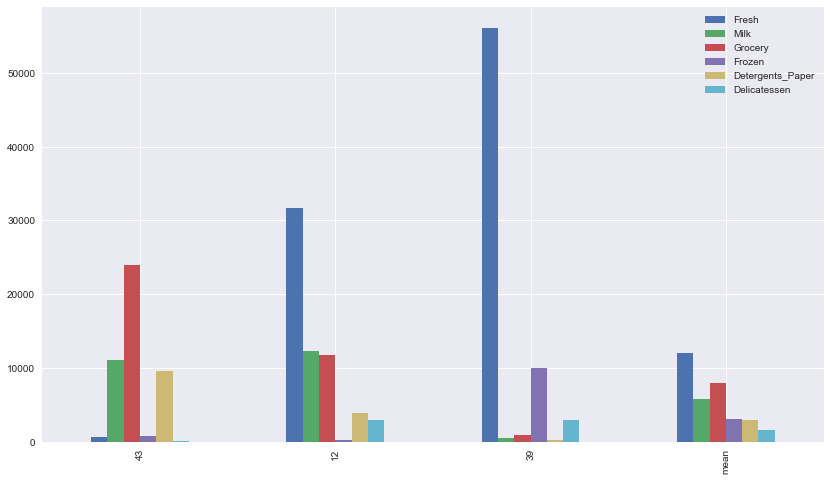

In [10]:
samples_bar.plot(kind='bar', figsize=(14,8))

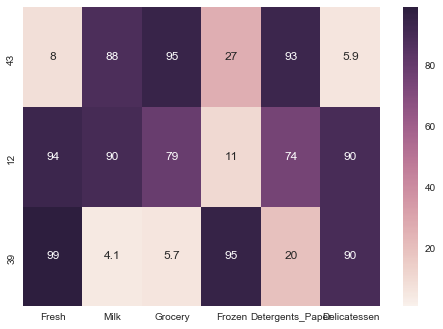

In [11]:
# 计算percentile
percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)

percentiles = percentiles.iloc[indices]

sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

- "Fresh", "Frozen","Delicatessen"都低,主要为"Grocery", "Milk","Detergents_Paper"
- "Frozen"低,主要是"Fresh", "Milk", "Grocery"      
- "Fresh" ,"Frozen"     

### 特征分布

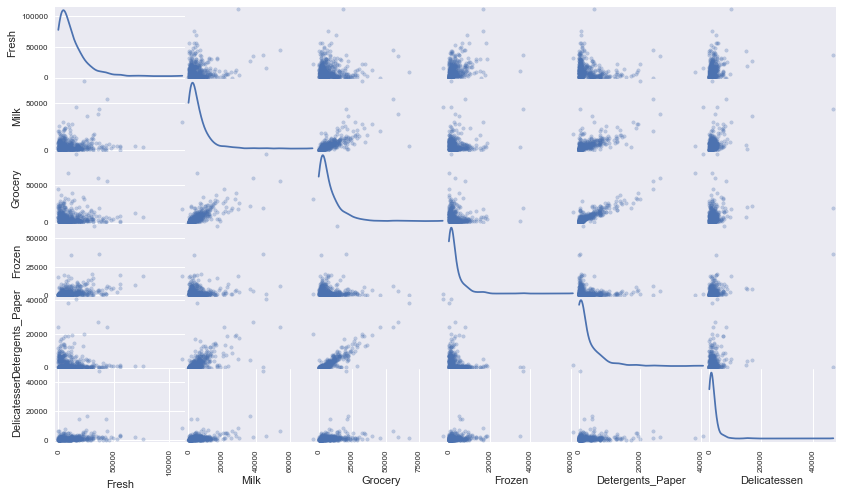

In [12]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

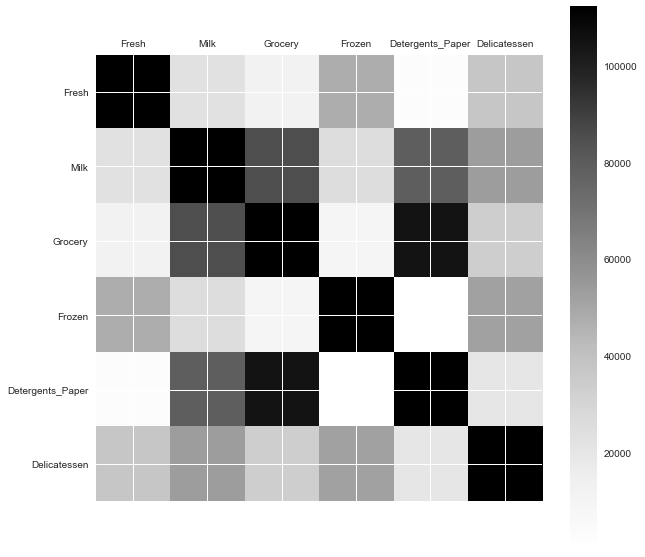

In [13]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')  
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    

plot_corr(data)

相关关系
- Grocery , Detergents_Paper.
- Grocery , Milk.
- Detergents_Paper , Milk 
- Grocery ,Detergents_Paper,Milk 
- 数据分布有skrew

## 处理数据

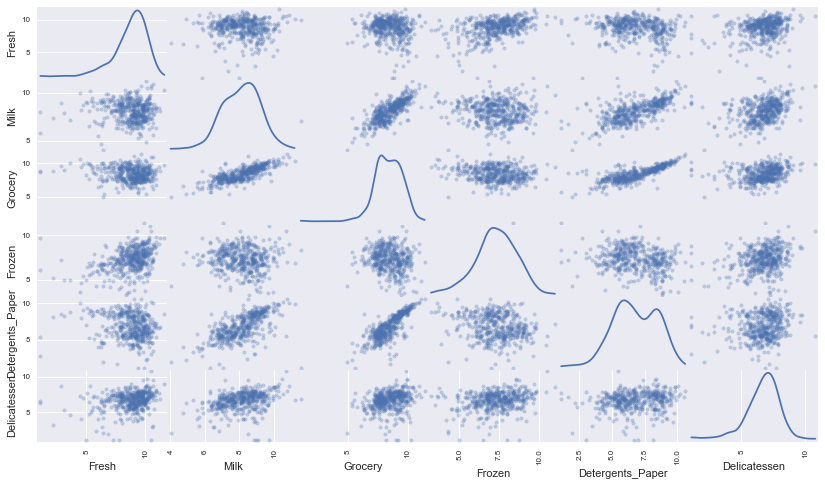

In [14]:
log_data = np.log(data)

log_samples = np.log(samples)

pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [15]:
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
1,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
2,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968


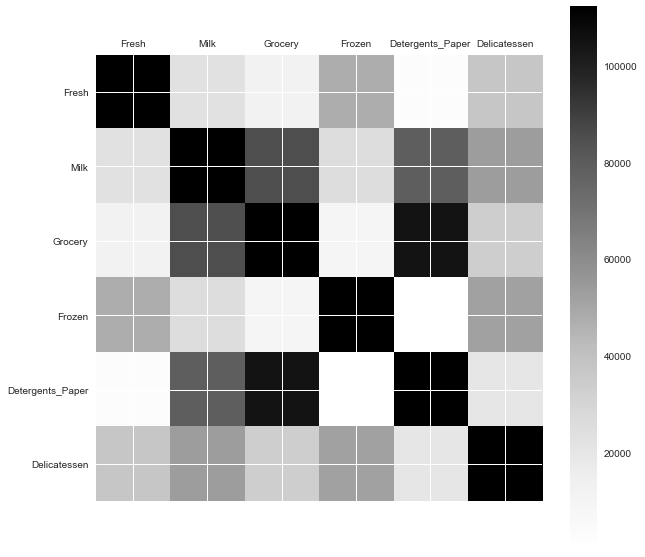

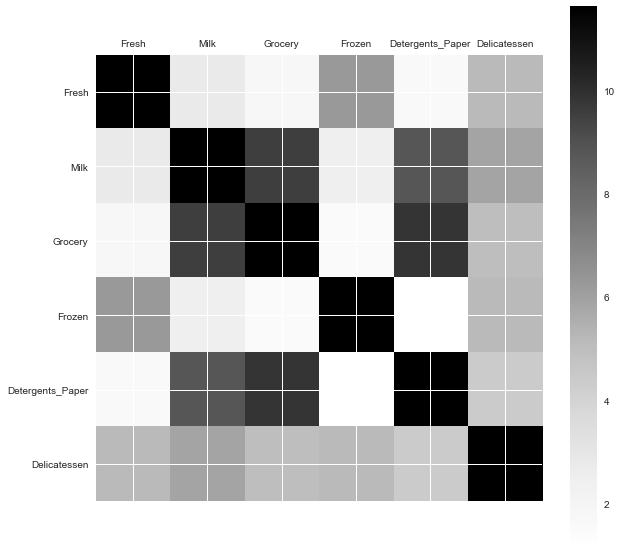

In [16]:
plot_corr(data)
plot_corr(log_data)

变化
- Grocery , Detergents_Paper 相关性变弱
- Grocery , Milk 相关性变强
- Detergents_Paper , Milk 相关性变强

### 异常数据
[Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/)

In [17]:
np.percentile(data.loc[:, 'Milk'], 25)

1533.0

In [18]:
import itertools

In [19]:
outliers_lst  = []

# 1.5 IQR
for feature in log_data.columns:
    Q1 = np.percentile(log_data.loc[:, feature], 25)    
    Q3 = np.percentile(log_data.loc[:, feature], 75)
    step = 1.5 * (Q3 - Q1)
    
    print("Data points considered outliers for the feature '{}':".format(feature))
    
    outliers_rows = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), :]
    outliers_lst.append(list(outliers_rows.index))
        
outliers = list(itertools.chain.from_iterable(outliers_lst))

uniq_outliers = list(set(outliers))
dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))
        
print('Outliers list:\n', uniq_outliers)
print('Length of outliers list:\n', len(uniq_outliers))

print('Duplicate list:\n', dup_outliers)
print('Length of duplicates list:\n', len(dup_outliers))

# Remove duplicate outliers
good_data = log_data.drop(log_data.index[dup_outliers]).reset_index(drop = True)

# Original Data 
print('Original shape of data:\n', data.shape)
# Processed Data
print('New shape of data:\n', good_data.shape)

Data points considered outliers for the feature 'Fresh':
Data points considered outliers for the feature 'Milk':
Data points considered outliers for the feature 'Grocery':
Data points considered outliers for the feature 'Frozen':
Data points considered outliers for the feature 'Detergents_Paper':
Data points considered outliers for the feature 'Delicatessen':
Outliers list:
 [128, 264, 137, 142, 145, 154, 412, 285, 161, 289, 420, 38, 171, 429, 175, 304, 305, 439, 183, 57, 184, 187, 65, 66, 193, 325, 75, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109]
Length of outliers list:
 42
Duplicate list:
 [128, 65, 66, 75, 154]
Length of duplicates list:
 5
Original shape of data:
 (440, 6)
New shape of data:
 (435, 6)


### PCA

In [20]:
from sklearn.decomposition import PCA

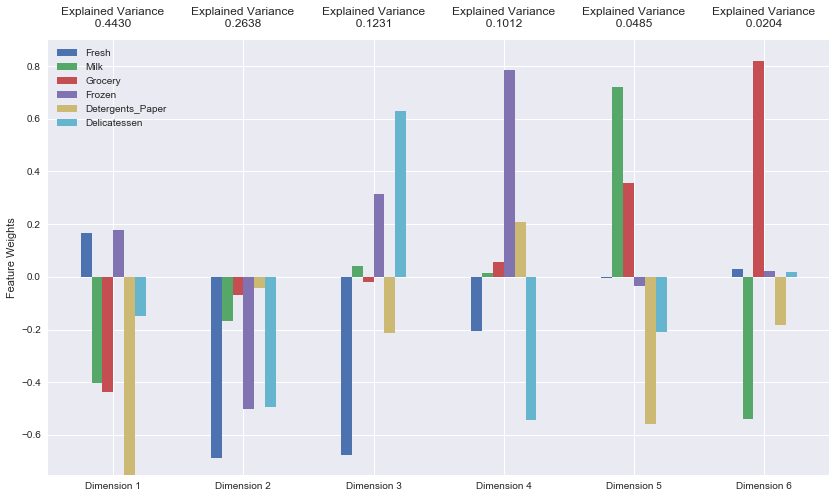

In [24]:
pca = PCA(n_components=6)
pca.fit(good_data)
pca_samples = pca.transform(log_samples)
pca_results = pcaplot.pca_results(good_data, pca)

In [42]:
pca.components_

array([[ 0.16746374, -0.40143866, -0.43811142,  0.17820975, -0.75142613,
        -0.14987105],
       [-0.68593522, -0.16722783, -0.07072902, -0.50054207, -0.04244398,
        -0.49414702]])

In [25]:
display(pca_results)

display(type(pca_results))

display(pca_results['Explained Variance'].cumsum())

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


pandas.core.frame.DataFrame

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

- 前2个主成分代表70.68% 的variance
- 前4个主成分代表93.11% variance
- 解读:
    - PC1:PC1的增加与"Milk", "Grocery" ,"Detergents_Paper"相关
    - PC2:PC2与 "Fresh", "Frozen" ,"Delicatessen"      
    - PC3:PC3增加,对应"Delicatessen" 增加,"Fresh"减少       

In [26]:
pca = PCA(n_components=2)
pca.fit(good_data)
pca_samples = pca.transform(log_samples)
reduced_data = pca.transform(good_data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [27]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-3.1072,2.7017
1,-2.2406,-1.2419
2,3.0426,-2.5854


## Clustering

- K-means
    - 目标是最小化同一Cluter内点的距离
    - 明确分类(Hard assignment)
    - 易于理解
    - 可能出现局部最优(初始化相关)
    - 计算复杂性
    - outlier影响

- Gaussian Mixture Model
    - Soft assignment(样本属于某个cluster概率)       
    - 灵活,同时soft 分类
    - 可能出现局部最优(初始化相关)
    - 更复杂,解释性

[silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) 

In [28]:
# Imports
from sklearn.mixture import GaussianMixture 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
# Create range of clusters 
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


**GMM Implementation**

In [30]:
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture (n_components=n_clusters).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.means_

    sample_preds = clusterer.predict(pca_samples)

    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.3761556577675909
For n_clusters = 3. The average silhouette_score is : 0.27823341921353933
For n_clusters = 4. The average silhouette_score is : 0.27381537748508145
For n_clusters = 5. The average silhouette_score is : 0.3474151521616262
For n_clusters = 6. The average silhouette_score is : 0.3063903905588759
For n_clusters = 7. The average silhouette_score is : 0.29640636098576434
For n_clusters = 8. The average silhouette_score is : 0.2878081642925773
For n_clusters = 9. The average silhouette_score is : 0.27082709589033693
For n_clusters = 10. The average silhouette_score is : 0.29846149587570847


**KNN**

In [31]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)
    preds = clusterer.predict(reduced_data)

    centers = clusterer.cluster_centers_

    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.4262810154691084
For n_clusters = 3. The average silhouette_score is : 0.3971382088445873
For n_clusters = 4. The average silhouette_score is : 0.3320225307732876
For n_clusters = 5. The average silhouette_score is : 0.3535592209844272
For n_clusters = 6. The average silhouette_score is : 0.3679077471679497
For n_clusters = 7. The average silhouette_score is : 0.36350322430458637
For n_clusters = 8. The average silhouette_score is : 0.3641244253986446
For n_clusters = 9. The average silhouette_score is : 0.344441121188331
For n_clusters = 10. The average silhouette_score is : 0.3412138026356374


[BIC](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html) 也可以用来选几个cluster

这里似乎2是不错选择

### Cluster可视化

In [32]:
clusterer = GaussianMixture(n_components=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

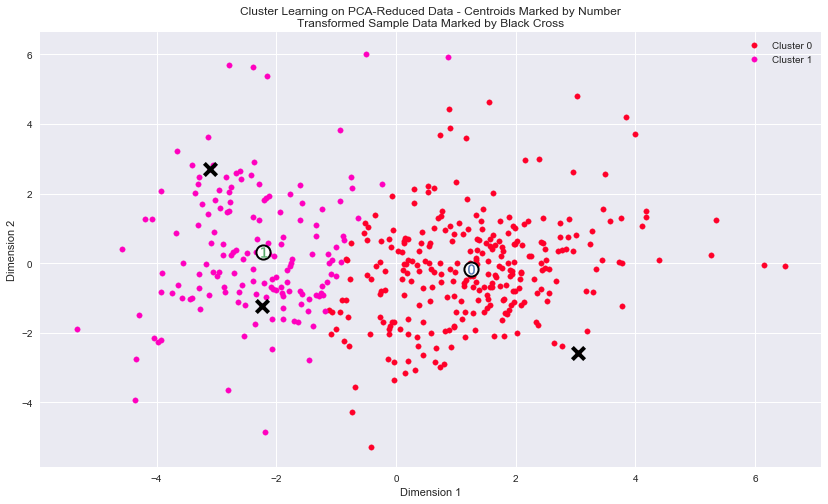

In [34]:
pcaplot.cluster_results(reduced_data, preds, centers, pca_samples)

把数据变换回去

In [35]:
log_centers = pca.inverse_transform(centers)

true_centers = np.exp(log_centers)

segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.columns)
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8939.0,2108.0,2758.0,2073.0,352.0,730.0
Segment 1,3567.0,7860.0,12249.0,873.0,4713.0,966.0


把之前的channel加回去看看(Hotel/Restaurant/Cafe ;Retail)

In [36]:
dup_outliers

[128, 65, 66, 75, 154]

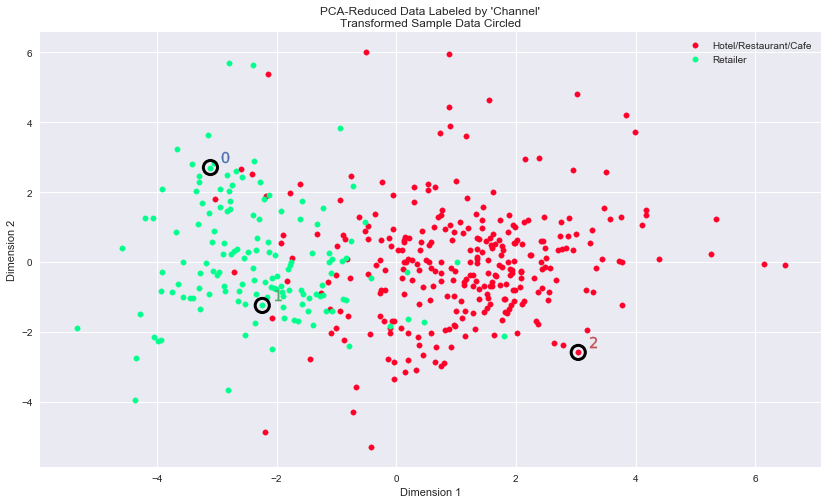

In [38]:
pcaplot.channel_results(reduced_data, dup_outliers, pca_samples)

In [ ]:
def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

def cluster_results(reduced_data, preds, centers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


def channel_results(reduced_data, outliers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
	Data is labeled by "Channel" and cues added for student-selected sample data
	'''

	# Check that the dataset is loadable
	try:
	    full_data = pd.read_csv("../data/customers.csv")
	except:
	    print("Dataset could not be loaded. Is the file missing?")
	    return False

	# Create the Channel DataFrame
	channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
	channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
	labeled = pd.concat([reduced_data, channel], axis = 1)
	
	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned Channel
	labels = ['Hotel/Restaurant/Cafe', 'Retailer']
	grouped = labeled.groupby('Channel')
	for i, channel in grouped:   
	    channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);
	    
	# Plot transformed sample points   
	for i, sample in enumerate(pca_samples):
		ax.scatter(x = sample[0], y = sample[1], \
	           s = 200, linewidth = 3, color = 'black', marker = 'o', facecolors = 'none');
		ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), alpha = 1, s=125);

	# Set plot title
	ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");